In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("E:/Je respire/解析/1.2 脳血流と問題カテゴリの関連 - 背外側追加.xlsx", sheet_name="ディアビアイ")

In [4]:
df0 = df[["subject", "question", "q_category", "score", "right_haigai", "hainai", "left_haigai", "dataset_no", "sheet_name"]]

In [5]:
df_recognition = df0[df0["q_category"] == 3].reset_index(drop=True)
df_reading = df0[df0["q_category"] == 1].reset_index(drop=True)
df_memory = df0[df0["q_category"] == 2].reset_index(drop=True)
df_attention = df0[df0["q_category"] == 4].reset_index(drop=True)

In [6]:
df_hainai = pd.DataFrame({
    "recognition": df_recognition["hainai"],
    "reading": df_reading["hainai"],
    "memory": df_memory["hainai"],
    "attention": df_attention["hainai"]})

df_right_haigai = pd.DataFrame({
    "recognition": df_recognition["right_haigai"],
    "reading": df_reading["right_haigai"],
    "memory": df_memory["right_haigai"],
    "attention": df_attention["right_haigai"]})

df_left_haigai = pd.DataFrame({
    "recognition": df_recognition["left_haigai"],
    "reading": df_reading["left_haigai"],
    "memory": df_memory["left_haigai"],
    "attention": df_attention["left_haigai"]})

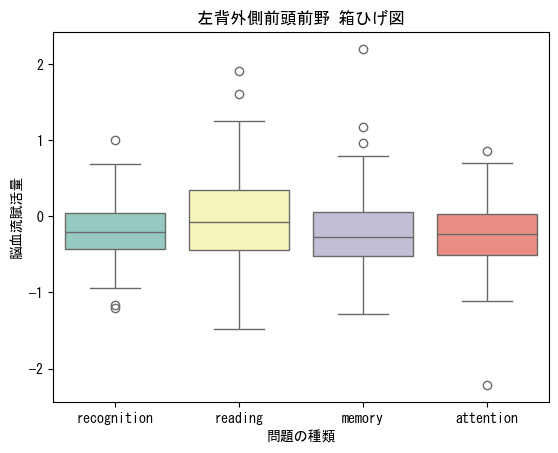

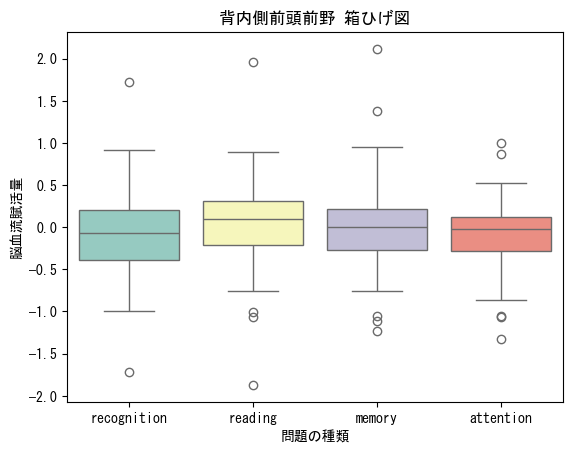

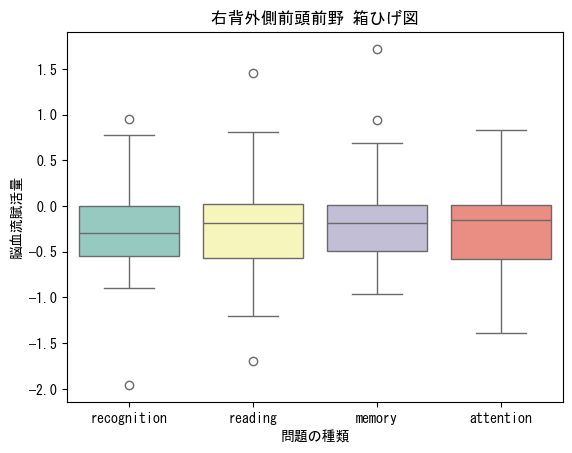

In [7]:
plt.rcParams['font.family'] = 'MS Gothic'  # または 'Meiryo'


sns.boxplot(data=df_left_haigai, palette="Set3")
plt.title(f'左背外側前頭前野 箱ひげ図')
plt.ylabel('脳血流賦活量')
plt.xlabel('問題の種類')
plt.show()

sns.boxplot(data=df_hainai, palette="Set3")
plt.title(f'背内側前頭前野 箱ひげ図')
plt.ylabel('脳血流賦活量')
plt.xlabel('問題の種類')
plt.show()

sns.boxplot(data=df_right_haigai, palette="Set3")
plt.title(f'右背外側前頭前野 箱ひげ図')
plt.ylabel('脳血流賦活量')
plt.xlabel('問題の種類')
plt.show()

In [8]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# --- 2. 一元配置分散分析（One-Way ANOVA）の実行 ---
# f_oneway関数は、F値とp値を返す
f_statistic, p_value = stats.f_oneway(df_hainai["attention"], df_hainai["memory"], df_hainai["reading"], df_hainai["recognition"])
print("--- hainaiの4種類の問題に対するANOVAの結果 ---")
print(f"F値: {f_statistic:.4f}")
print(f"p値: {p_value:.4f}\n")

f_statistic, p_value = stats.f_oneway(df_right_haigai["attention"], df_right_haigai["memory"], df_right_haigai["reading"], df_right_haigai["recognition"])
print("--- right_haigaiの4種類の問題に対するANOVAの結果 ---")
print(f"F値: {f_statistic:.4f}")
print(f"p値: {p_value:.4f}\n")

f_statistic, p_value = stats.f_oneway(df_left_haigai["attention"], df_left_haigai["memory"], df_left_haigai["reading"], df_left_haigai["recognition"])
print("--- left_haigaiの4種類の問題に対するANOVAの結果 ---")
print(f"F値: {f_statistic:.4f}")
print(f"p値: {p_value:.4f}\n")

--- hainaiの4種類の問題に対するANOVAの結果 ---
F値: 1.1747
p値: 0.3200

--- right_haigaiの4種類の問題に対するANOVAの結果 ---
F値: 0.4047
p値: 0.7498

--- left_haigaiの4種類の問題に対するANOVAの結果 ---
F値: 1.8972
p値: 0.1307



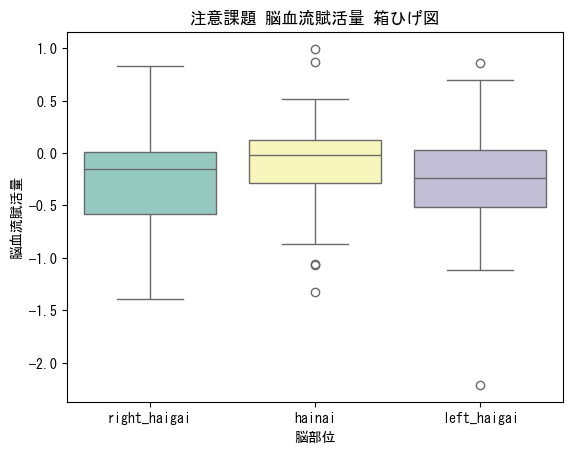

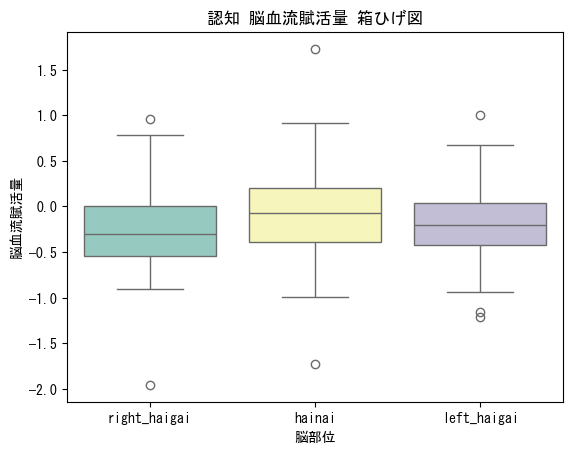

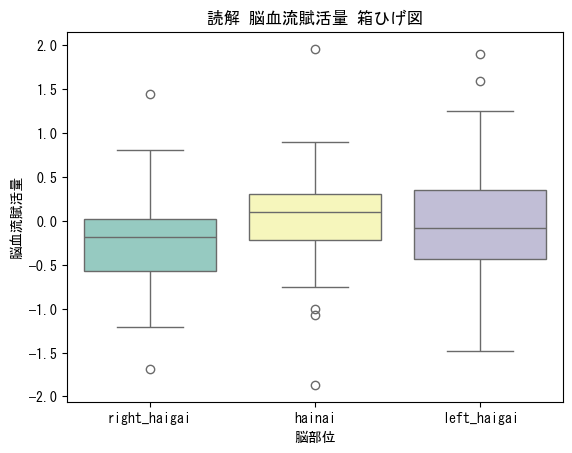

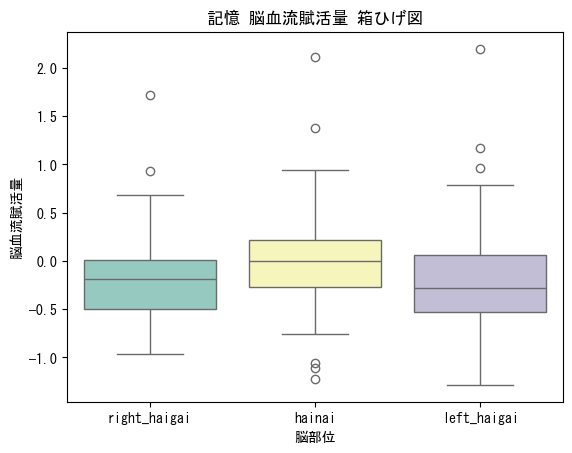

In [9]:
plt.rcParams['font.family'] = 'MS Gothic'  # または 'Meiryo'


sns.boxplot(data=df_attention[["right_haigai", "hainai", "left_haigai"]], palette="Set3")
plt.title(f'注意課題 脳血流賦活量 箱ひげ図')
plt.ylabel('脳血流賦活量')
plt.xlabel('脳部位')
plt.show()

sns.boxplot(data=df_recognition[["right_haigai", "hainai", "left_haigai"]], palette="Set3")
plt.title(f'認知 脳血流賦活量 箱ひげ図')
plt.ylabel('脳血流賦活量')
plt.xlabel('脳部位')
plt.show()

sns.boxplot(data=df_reading[["right_haigai", "hainai", "left_haigai"]], palette="Set3")
plt.title(f'読解 脳血流賦活量 箱ひげ図')
plt.ylabel('脳血流賦活量')
plt.xlabel('脳部位')
plt.show()

sns.boxplot(data=df_memory[["right_haigai", "hainai", "left_haigai"]], palette="Set3")
plt.title(f'記憶 脳血流賦活量 箱ひげ図')
plt.ylabel('脳血流賦活量')
plt.xlabel('脳部位')
plt.show()

In [10]:
# --- 2. 一元配置分散分析（One-Way ANOVA）の実行 ---
# f_oneway関数は、F値とp値を返す
f_statistic, p_value = stats.f_oneway(df_attention["left_haigai"], df_attention["hainai"], df_attention["right_haigai"])
print("--- attentionの3種類の脳部位に対するANOVAの結果 ---")
print(f"F値: {f_statistic:.4f}")
print(f"p値: {p_value:.4f}\n")

f_statistic, p_value = stats.f_oneway(df_reading["left_haigai"], df_reading["hainai"], df_reading["right_haigai"])
print("--- readingの3種類の脳部位に対するANOVAの結果 ---")
print(f"F値: {f_statistic:.4f}")
print(f"p値: {p_value:.4f}\n")

f_statistic, p_value = stats.f_oneway(df_recognition["left_haigai"], df_recognition["hainai"], df_recognition["right_haigai"])
print("--- recognitionの3種類の脳部位に対するANOVAの結果 ---")
print(f"F値: {f_statistic:.4f}")
print(f"p値: {p_value:.4f}\n")

f_statistic, p_value = stats.f_oneway(df_memory["left_haigai"], df_memory["hainai"], df_memory["right_haigai"])
print("--- memoryの3種類の脳部位に対するANOVAの結果 ---")
print(f"F値: {f_statistic:.4f}")
print(f"p値: {p_value:.4f}\n")

--- attentionの3種類の脳部位に対するANOVAの結果 ---
F値: 2.6980
p値: 0.0701

--- readingの3種類の脳部位に対するANOVAの結果 ---
F値: 3.6563
p値: 0.0278

--- recognitionの3種類の脳部位に対するANOVAの結果 ---
F値: 3.4200
p値: 0.0349

--- memoryの3種類の脳部位に対するANOVAの結果 ---
F値: 2.9404
p値: 0.0554

